<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
file_4 = urllib.request.urlopen(url_4)

url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_5 = urllib.request.urlopen(url_5)

url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4, file_5, file_6]

In [ ]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})

In [ ]:
df

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'of inferiority and shyness he had felt on bei...
2,0,"'very forceful, and Cohn never had a chance of..."
3,0,"'""You forgot to get your paper,"" I said.''""Tha..."
4,0,"'""None of your exalted connections getting div..."
...,...,...
534,5,"'Now they have beaten me, he thought. I am to..."
535,5,"'others too, he thought. I live in a good tow..."
536,5,"'fight again, he thought. I hope so much I do..."
537,5,'sailed up onto the little patch of shingle be...


In [ ]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926, 1927,1933,1935,1950,1952]})
year_df

,id,year
0,0,1926
1,1,1927
2,2,1933
3,3,1935
4,4,1950
5,5,1952


In [ ]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."


In [ ]:
df['book_text_processed'].iloc[0]

'a project gutenberg canada ebook this ebook is made available at no cost and with very fewrestrictions these restrictions apply only if (1) you makea change in the ebook (other than alteration for differentdisplay devices) or (2) you are making commercial use ofthe ebook if either of these conditions applies pleasecheck gutenbergca/links/licencehtml before proceedingthis work is in the canadian public domain but may beunder copyright in some countries if you live outside canada"check your countrys copyright laws if the book is under"copyright in your country do not downloador redistribute this filetitle: the sun also risesauthor: hemingway ernest (1899-1961)date of first publication: 1926edition used as base for this ebook:"new york: charles scribners sons"[undated but no earlier than 1954the date of the copyright renewal]date first posted: 4 july 2015date last updated: 4 july 2015project gutenberg canada ebook #1257this ebook was produced bymarcia brooks al haines paulina chin mark a

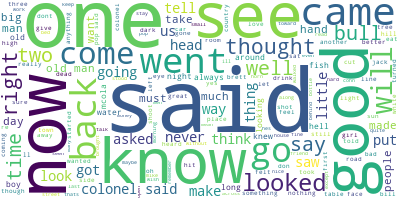

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# **K-means**

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."
...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too o...
535,5,"'others too, he thought. I live in a good tow...",others too he thought i live in a good townhe...
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do no...
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,1,100678,1030,1081thi,10part,11,1100,118of,12,1253thi,1257thi,1300,1302thi,1305,1335,1700,172part,17th,183260,1890\,1899,1899-1961,1905,1909,1918,1925,1926edit,1927,1927edit,1929,1933edit,1933first,1935edit,1936,1936jonathan,1942,1950edit,1952,1952date,1952edit,...,yousaw,youse,yousink,yousmok,yousom,yousometh,youstop,yousuddenli,youth,youthat,youthink,youththeir,youto,youtri,youv,youviol,youwant,youwelcom,youwer,youwhat,youwil,youwould,yowlercamp-follow,yucatan,yuhh,yuletid,zebra,zeiss,zelli,zenzon,zigzag,zinc,zipper,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...
...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [ ]:
df['num_unique_words'] = df['book_text_processed'].apply(lambda x: len(np.unique(x.split(" "))))

In [ ]:
df = pd.merge(df, year_df, on='id',how='left')

In [ ]:
df

,id,text,book_text_processed,num_unique_words,year
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,141,1926
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,212,1926
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,196,1926
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,225,1926
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,199,1926
...,...,...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,205,1952
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,208,1952
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,211,1952
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,191,1952


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


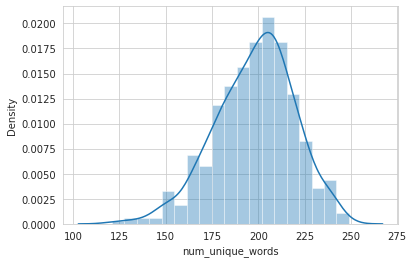

In [ ]:
sns.distplot(df['num_unique_words'])

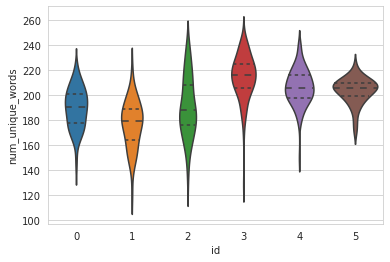

In [ ]:
sns.violinplot(x="id", y="num_unique_words", data=df, split=True, inner='quartile')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


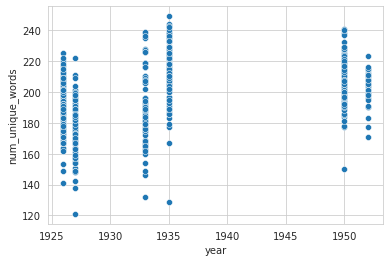

In [ ]:
sns.scatterplot('year', 'num_unique_words', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f1b440fc190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


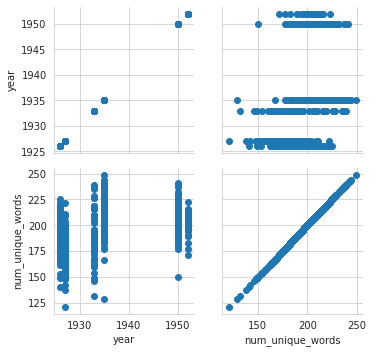

In [ ]:
g = sns.PairGrid(df, vars = ['year',  'num_unique_words'],  palette='RdBu_r')
g.map(plt.scatter)
g.add_legend()

In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,a,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abomin,about,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,...,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,yet,york,you,youd,young,younger,your,yourself,youth,youv,yuletid,zebra,zigzag,zinc
0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,2,0,0,0,0,0,0,0
1,19,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,10,0,0,0,1,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,21,0,0,0,3,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
535,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,2,0,0,0,0,0,0,0
536,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
537,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=False)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abomin,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,accustom,ace,...,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.072548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.072548,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.043519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.043519,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.087204,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.043234,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.043234,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.040996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.046575,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abomin,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,accustom,ace,...,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.092835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.070728,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.047335,0.0,0.0,0.0,0.000000,0.054964,0.0,0.044323,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115552,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.056888,0.0,0.0,0.0,0.066459,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.061421,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.132275,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032657,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.071503,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.082926,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.059266,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.

In [ ]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

ValueError: ignored

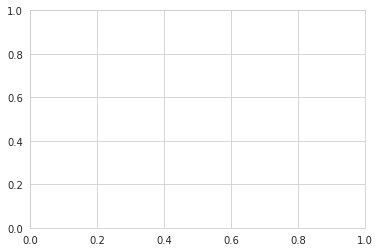

In [77]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [53]:
from sklearn.cluster import KMeans

number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [54]:
df['labels'] = km.labels_

In [55]:
zf = (df.groupby(['id','labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

,id,accuracy
0,0,0.631148
1,1,0.500000
2,2,0.565217
3,3,0.990991
4,4,0.942149
5,5,1.000000


In [56]:
matrix.shape

(539, 5649)

In [57]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]

In [58]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 3)
Y_sklearn = sklearn_svd.fit_transform(matrix)

In [59]:
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]
df['Z_3'] = Y_sklearn[:,2]

In [60]:
from sklearn.cluster import KMeans

number_of_clusters=4
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels'] = svd_km.labels_

In [61]:
zf = (df.groupby(['id','svd_labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

,id,accuracy
0,0,0.540984
1,1,0.621622
2,2,0.782609
3,3,0.882883
4,4,0.933884
5,5,0.976190


In [62]:
zf.sort_values('accuracy',inplace=True, ascending=False)
zf

,id,svd_labels,accuracy
16,5,2,0.976190
12,4,0,0.933884
11,3,2,0.882883
6,2,1,0.782609
3,1,1,0.621622
2,0,3,0.540984
0,0,1,0.303279
5,1,3,0.189189
4,1,2,0.189189
1,0,2,0.155738


In [63]:
id_map = {}
hash_done = {}
for _,row in zf.iterrows():
  if row['svd_labels'] in id_map:
    continue
  else:
    id_map[row['svd_labels']] = row['id']  

In [64]:
map_df = pd.DataFrame({'id':map(int, list(id_map.values())),'transformed_id':map(int,list(id_map.keys()))})
map_df

,id,transformed_id
0,5,2
1,4,0
2,2,1
3,0,3


In [65]:
plot_df = pd.merge(df,map_df,on='id',how='inner')
plot_df

,id,text,book_text_processed,num_unique_words,year,labels,Z_1,Z_2,Z_3,svd_labels,transformed_id
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,141,1926,0,0.102498,-0.058406,-0.017250,1,3
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,212,1926,0,0.257423,-0.082441,-0.085820,2,3
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,196,1926,3,0.414228,0.170227,0.059945,3,3
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,225,1926,0,0.313512,-0.028216,-0.059218,1,3
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,199,1926,3,0.403927,0.230458,0.041439,3,3
...,...,...,...,...,...,...,...,...,...,...,...
349,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,205,1952,1,0.286165,-0.187986,-0.181763,2,2
350,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,208,1952,1,0.316481,-0.122877,-0.098372,2,2
351,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,211,1952,1,0.272141,-0.140005,-0.124228,2,2
352,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,191,1952,1,0.300958,-0.129865,-0.167755,2,2


In [66]:
plot_df.columns

Index(['id', 'text', 'book_text_processed', 'num_unique_words', 'year',
       'labels', 'Z_1', 'Z_2', 'Z_3', 'svd_labels', 'transformed_id'],
      dtype='object')

ValueError: ignored

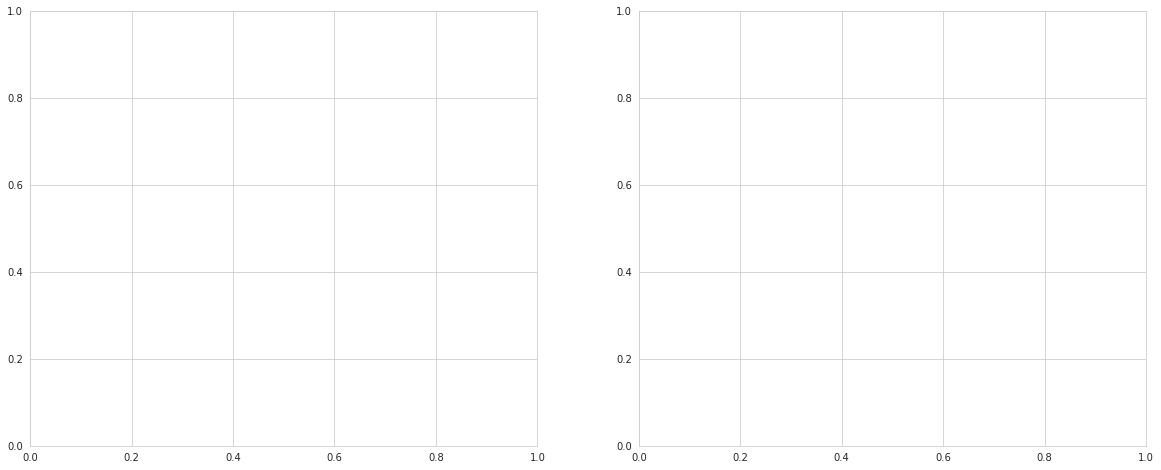

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['svd_labels'], s=50, cmap='viridis')

centers = svd_km.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

axes[1].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['transformed_id'], s=50, cmap='viridis')

In [68]:
import plotly.express as px
fig = px.scatter_3d(plot_df, x='Z_1', y='Z_2', z='Z_3',
              color='transformed_id')
fig.show()

In [69]:
import plotly.express as px
fig = px.scatter_3d(plot_df, x='Z_1', y='Z_2', z='Z_3',
              color='svd_labels')
fig.show()

In [70]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2
number_words = 100
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
the i you and to a it said he of in that wa is not t have they we me with at s all do on be but what for him go had she know colonel no there good as about like one hi were them my are can would up out get thi her so when don if from veri will your think come just did time want or now then ani who dont brett how well been right say too tell never some got an see could love ye girl down look here went bill take m hell

Topic #1:
the and of he a to wa in i it hi on we had that with him were out up as they there said at not all then but down for one back them from bull man could old came into now go went you over when where my see through get be would head pop come no fish did veri so thought by saw off look have water been two thi hand good me is like time watch us big long too their again road side or left onli made some if sun right after what shot befor across


In [71]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=3dc5c4bc8fa54411cebeaed57d0fc76895740e4f90b5004fe4c26e17add3daa3
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [72]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#with open(LDAvis_data_filepath, 'w') as f:
#  pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [74]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

In [75]:
from google.colab import files
files.download('ldavis_prepared_2.html') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>